In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-03-21 17:41:07.276409


<h1>Matplotlib - osa 6</h1>
<h2>Kahden arvoakselin kaavio</h2>

Tämä on jatkoa sarjan edellisille osille

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib3.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib5.ipynb

Jos esitettävät arvosarjat ovat eri suuruusluokkaa, niin kahden arvoakselin käyttö on paikallaan (kummallekin arvosarjalle oma arvoakseli).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Luon dataframen Helsingin pörssin kehityksestä vuosina 1980 - 1990
df = pd.DataFrame({'Indeksi':[85,83,116,144,193,184,254,320,405,442,284],
                 'Myynti':[307954,566829,1241391,2109871,3009299,9184649,24933405,29726136,31719819,15343617,6318198]},
                 index=[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990])
df

,Indeksi,Myynti
1980,85,307954
1981,83,566829
1982,116,1241391
1983,144,2109871
1984,193,3009299
1985,184,9184649
1986,254,24933405
1987,320,29726136
1988,405,31719819
1989,442,15343617


Ensimmäisen arvosarjan osalta kaavion voi tehdä normaalisti. Toista arvosarjaa varten luon <b>twinx</b>-toiminnolla kaavion, jolla on oma arvoakseli, mutta yhteinen x-akseli ensimmäisen arvosarjan kanssa.

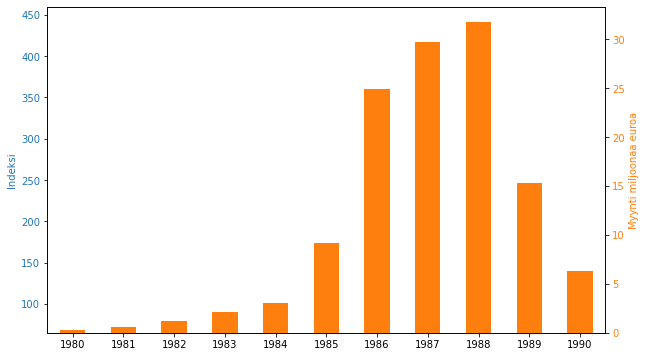

In [4]:
# Indeksi viivakaaviona
indeksi = df['Indeksi'].plot(color = 'C0', figsize = (10, 6))

# Indeksille ja sen akselille käytössä olevien värien ensimmäinen väri 'C0'
indeksi.set_ylabel('Indeksi', color = 'C0')

# Jakoviivoille väri 'C0'
indeksi.tick_params(axis = 'y', labelcolor = 'C0')

# Toinen kaavio, jolla on oma arvoakseli, mutta yhteinen x-akseli indeksin kanssa
myynti = indeksi.twinx()

# Myynnille ja sen akselille käytössä olevien värien toinen väri 'C1'
myynti.set_ylabel('Myynti miljoonaa euroa', color = 'C1')

# Myynti pylväinä
(df['Myynti'] / 1000000).plot.bar(color = 'C1', ax = myynti)

# Jakoviivoille väri 'C1'
myynti.tick_params(axis = 'y', labelcolor = 'C1')

<h2>Lisätietoa</h2>

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib7.ipynb käsittelee usean kaavion sijoittamista samaan kuvioon